In [1]:
import numpy as np
import pandas as pd
dataset = pd.read_csv(r'C:\Users\Alchemist\Documents\myProject\datasets\data.csv', header=0,
                      usecols = range(0, 32, 1))
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#dataset.info()
dataset

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
import matplotlib.pyplot as plt
features = dataset.columns.values.tolist()
# 将列表切片，将标签和id去除
features = features[2:32]
features
#sns.pairplot(data=dataset1, vars = features, hue = 'diagnosis', diag_kind='kde',  plot_kws = {'alpha':0.6})
#plt.savefig('pairplot.png')

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal dimension_worst']

In [49]:
#单特征分析
def analyse(dataset, feature_name, label_name, labels):
    %config InlineBackend.figure_format = 'svg'
    # 后缀列表
    kinds = ['_mean', '_se', '_worst']
    f, axes = plt.subplots(2, 6, figsize = (21, 7), sharex=False)
    plt.subplots_adjust(wspace =0.3, hspace =0.3)#调整子图间距
    for i in range(3):
        # 文件名尾部加上后缀
        feature_name_new =feature_name + kinds[i]
        sns.kdeplot(dataset[feature_name_new], color='black', shade=True, 
                    label=feature_name_new, ax = axes[0, 2*i])
        sns.kdeplot(dataset[dataset[label_name] == labels[0]][feature_name_new], color='r', 
                    shade=True, label=labels[0], ax = axes[0, 1 + 2*i])
        sns.kdeplot(dataset[dataset[label_name] == labels[1]][feature_name_new], color='g', 
                    shade=True, label=labels[1], ax = axes[0, 1 + 2*i])
        sns.violinplot(x=label_name, y=feature_name_new, data=dataset, ax=axes[1, 2*i])
        sns.boxplot(x=label_name, y=feature_name_new, data=dataset, ax=axes[1, 1+ 2*i])
    file_name = feature_name+'.png'
    plt.savefig(r'C:\Users\Alchemist\Documents\myProject\ppt\analyse\\' + file_name)

In [ ]:
f, axes = plt.subplots

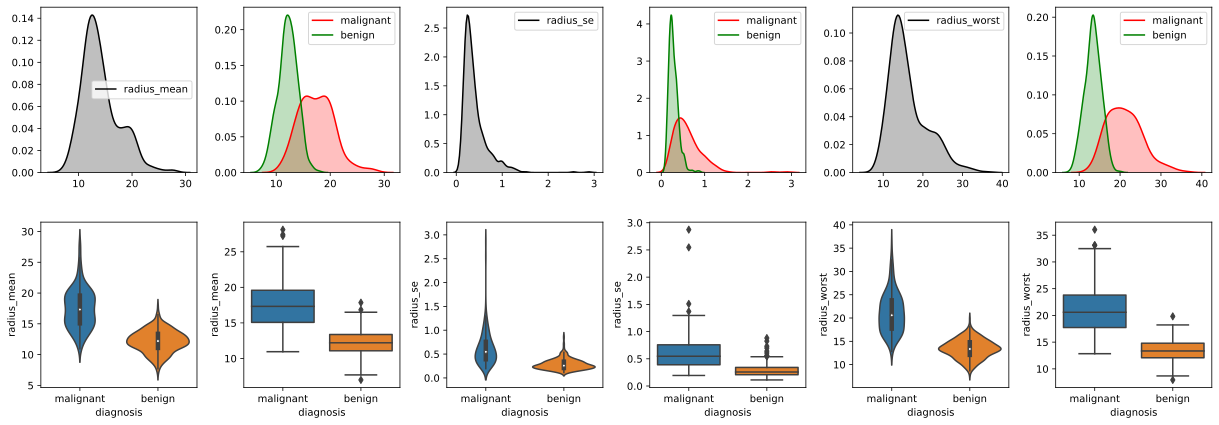

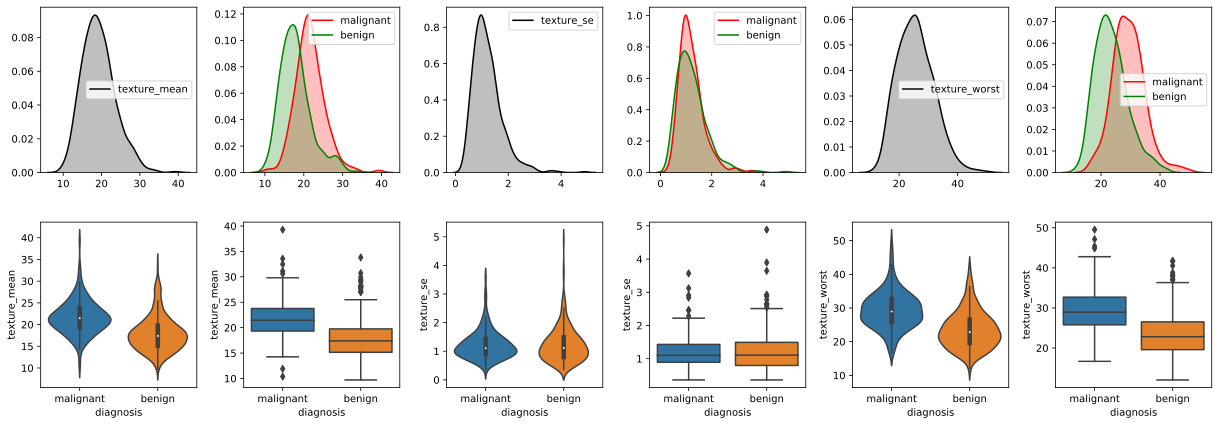

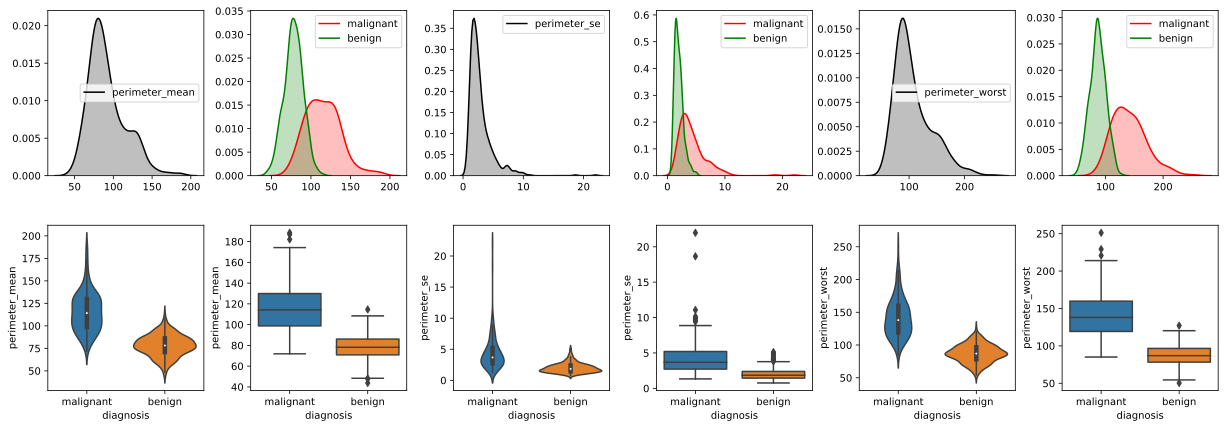

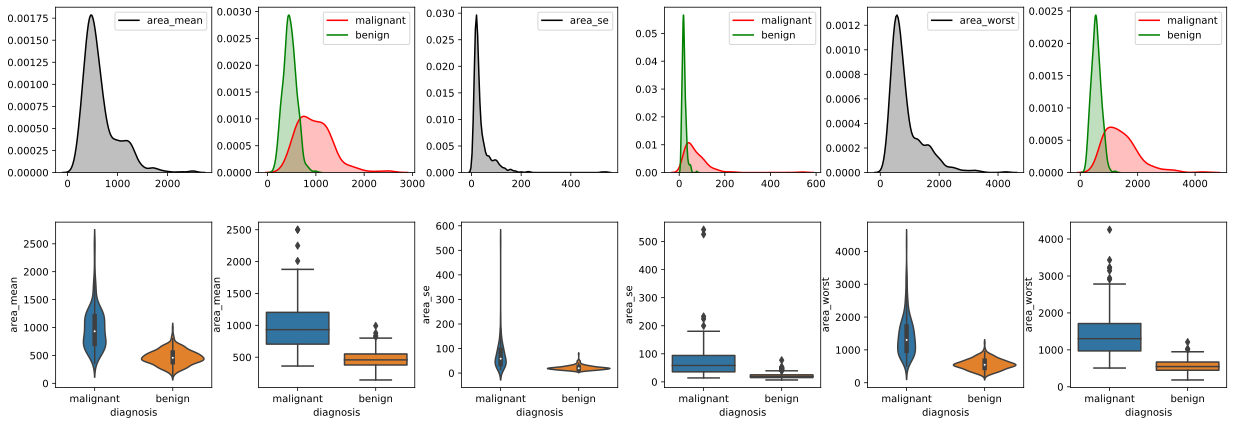

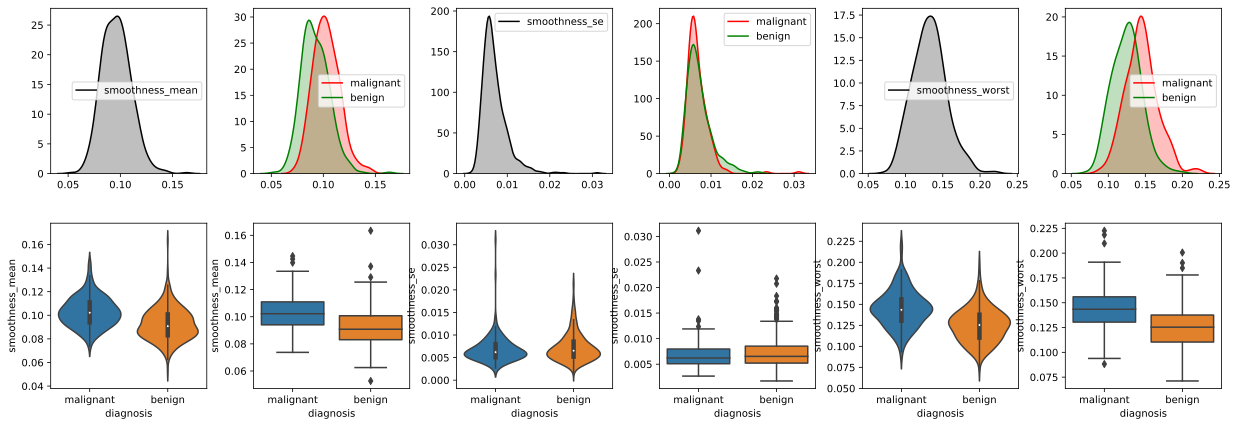

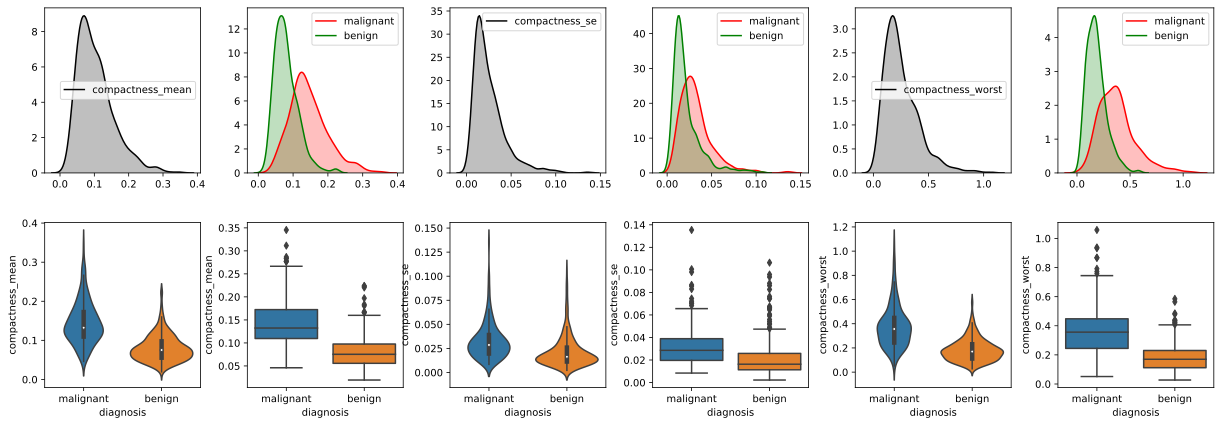

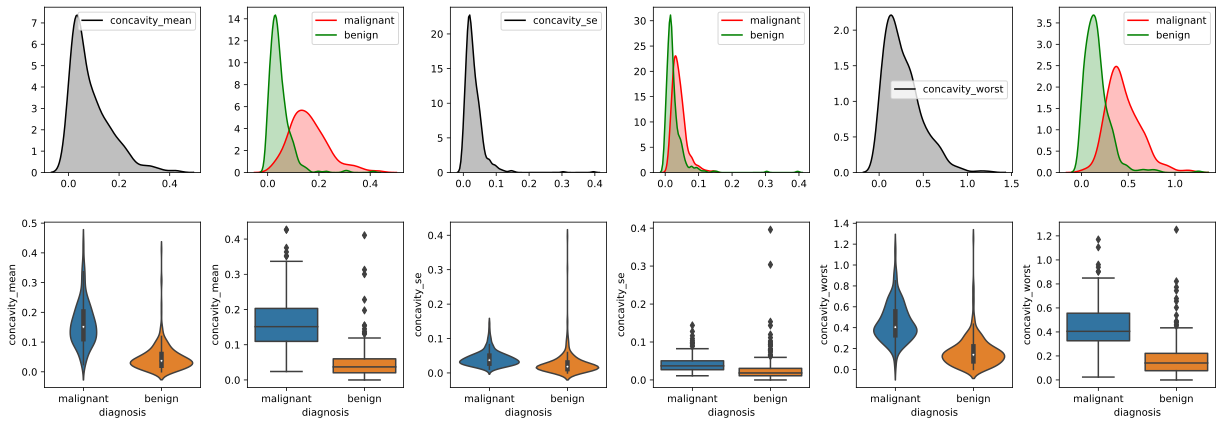

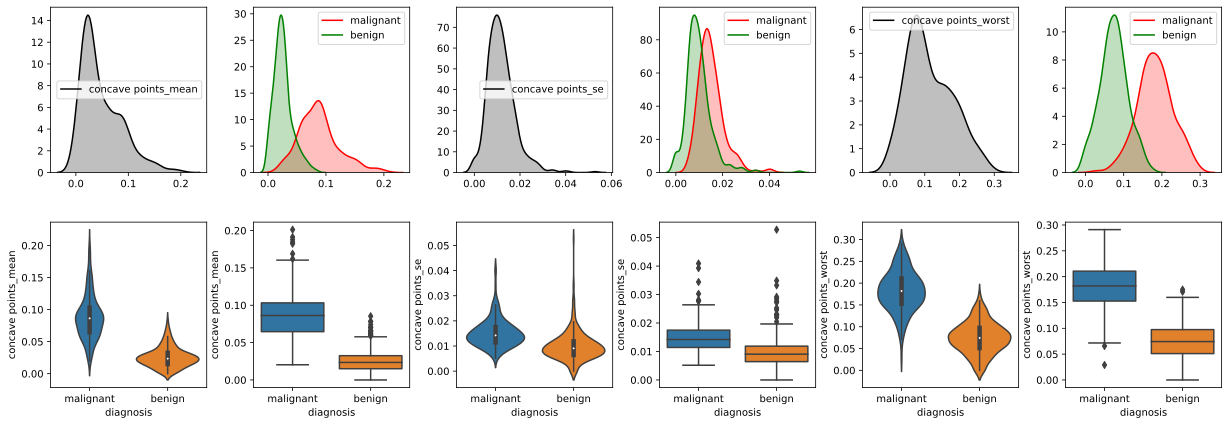

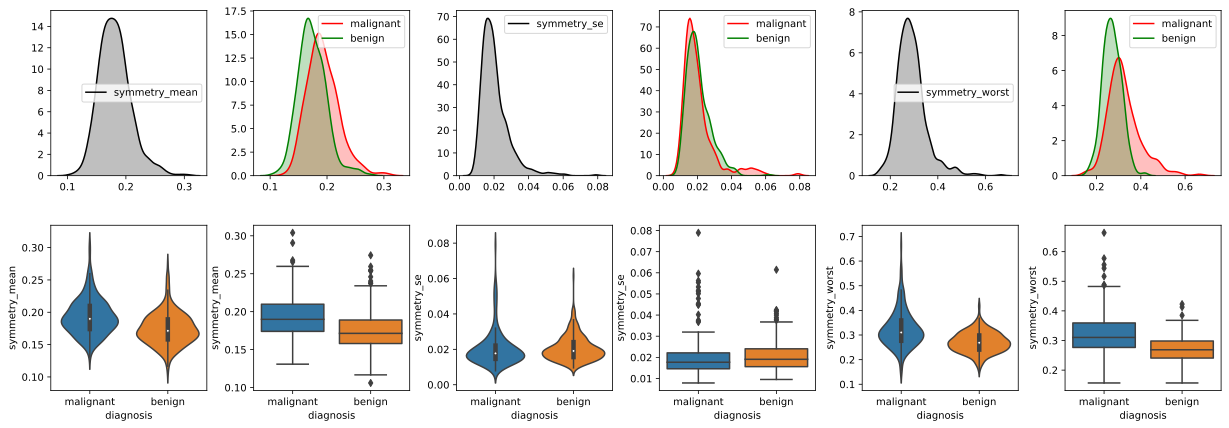

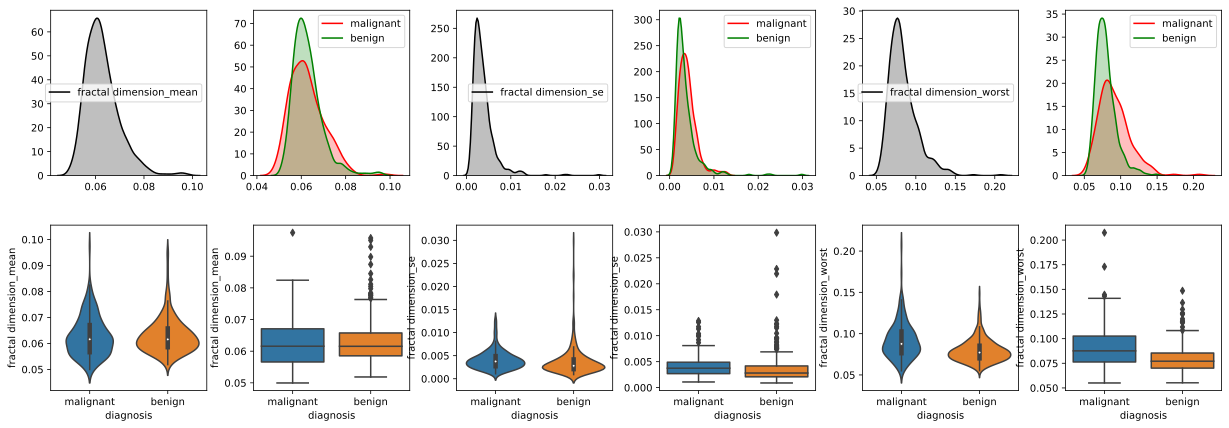

In [51]:
dataset_labels = ['malignant', 'benign']
# 将列表切片，将标签和id去除，去除_mean等后缀
features = features[0:10]
for i in range(len(features)):
    arr = features[i].split('_')
    n = len(arr)
    features[i] = arr[0]
    # 如果特征名本身带有'_'的情况处理                 
    if n > 2:
        for k in range(1, n-1):
            features[i] += '_'
            features[i] += arr[k]
# 分析每一个特征在不同类别中的分布
for feature in features:
    analyse(dataset, feature, 
            'diagnosis', dataset_labels)

0.9978552814938108


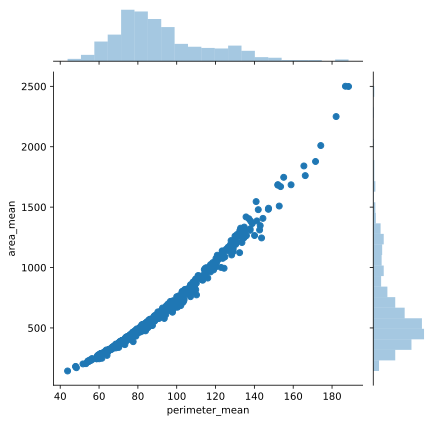

In [6]:
#双变量分析
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
sns.jointplot(x='perimeter_mean', y='area_mean', 
              data=dataset)
plt.plot()
X = np.array(dataset)
dataset_target = X[:, 1]
dataset_data = X[:, 2:32]
pear, p_value = pearsonr(dataset_data[:,0], dataset_data[:,2])
print(pear)
plt.savefig(r'C:\Users\Alchemist\Documents\myProject\ppt\duo_analyse\pa.png')

In [5]:
pear, p_value = pearsonr(dataset_data[:,0], dataset_data[:,2])
print(pear)

0.9978552814938108


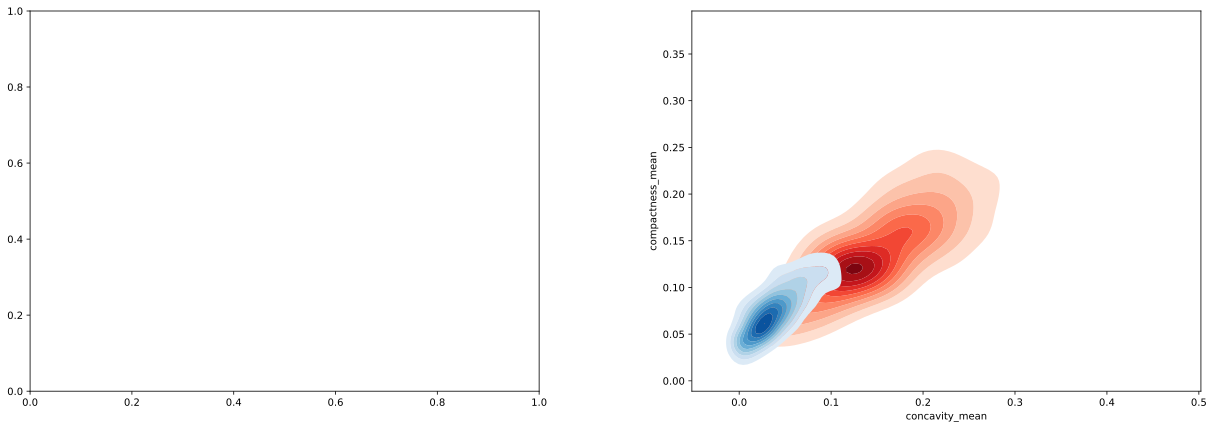

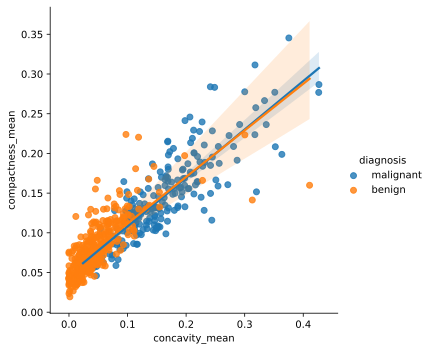

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
f, axes = plt.subplots(1, 2, figsize = (21, 7), sharex=False)
plt.subplots_adjust(wspace =0.3, hspace =0.3)#调整子图间距
sns.lmplot(x='concavity_mean', y='compactness_mean', data=dataset, 
           fit_reg=True, hue='diagnosis')
diagnosis_M = dataset.query("diagnosis == 'malignant'")
diagnosis_B = dataset.query("diagnosis == 'benign'")
sns.kdeplot(diagnosis_M['concavity_mean'], diagnosis_M['compactness_mean'], 
            cmap='Reds', shade = True, shade_lowest = False, ax=axes[1])
sns.kdeplot(diagnosis_B['concavity_mean'], diagnosis_B['compactness_mean'], 
            cmap='Blues', shade = True, shade_lowest = False, ax=axes[1])
# axes.text(0,0.02, 'benign', color='b')
# axes.text(0.27, 0.15, 'malignant', color='r')

In [2]:
#标签数值化
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder().fit(dataset['diagnosis'])
dataset['diagnosis'] = encoder.transform(dataset['diagnosis'])
print('标签个数: %s' % encoder.classes_)
print('标签值标准化: %s' % encoder.transform(['benign', 'malignant']))

标签个数: ['benign' 'malignant']
标签值标准化: [0 1]


In [3]:
#画出TSNE图
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
X = np.array(dataset)
dataset_target = X[:, 1]
dataset_data = X[:, 2:32]
f, axes = plt.subplots(2, 3, figsize=(9,6))
#调整子图间距
plt.subplots_adjust(wspace =0.3, hspace =0.3)
# perplexity 从 5~50
perplexity_values = [5, 10, 20, 30, 40, 50]
for i in range(6):
    tsne = TSNE(n_components=2, perplexity=perplexity_values[i])
    dataset_tsne = tsne.fit_transform(dataset_data)
    axes[int(i/3),i%3].scatter(dataset_tsne[:, 0], dataset_tsne[:, 1], c = dataset_target)
    axes[int(i/3),i%3].set_title('perplexity = ' + str(perplexity_values[i]))
file_name = 'TSNE.png'
plt.savefig(file_name)
plt.show()

<Figure size 900x600 with 6 Axes>

In [3]:
from collections import Counter
print(Counter(dataset_target))

Counter({'benign': 357, 'malignant': 212})


In [4]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
dataset_data_OS, dataset_target_OS = ros.fit_sample(dataset_data, dataset, target)
Couner(dataset_target_OS)

ModuleNotFoundError: No module named 'imblearn'